# Introduction

For the past week you have been learning about new Python libraries: `Numpy` and `Pandas`. Up until now we haven't talked too much about what makes these libraries useful. Yeah, `Numpy` is good for vectorizing computations, and `Pandas` is good for loading and manipulating data; but are those tasks ends, in and of themselves, or means to an end? 

The answer, as with many of our answers, is, it depends. So far you've seen both libraries used independent of any particular task. Tonight that changes. Tonight we will use these libraries in efforts to accomplish the same end as [Pinky and the Brain](https://en.wikipedia.org/wiki/Pinky_and_the_Brain)! Ok, maybe be won't be trying to take over the world (...or will we?), but we will be working on just as lofty an endeavour: predicting the unknown.

### Types of Learning

In the realm of Data Science we talk about two distinct types of learning from data, [supervised](https://en.wikipedia.org/wiki/Supervised_learning) and [unsupervised](https://en.wikipedia.org/wiki/Unsupervised_learning). There are other sub-classes of these two types of learning, but for the most part any data science pursuit can be classified into one of these two. **Unsupervised learning** consists of trying to find unapparent structure in your data that holds meaningful information. Today we are going to be focusing on **supervised learning**, though. This brand of learning attempts to build a model that predicts a target outcome from known inputs. This is accomplished through the use of inputs with correct targets to train the model. For example, if I'm trying to predict whether or not there will be a traffic jam on the highway. Data to solve this problem might have inputs such as the day of the week, the time of day, whether or not it's a holiday, if there is a major event going on that day, etc; and a target of traffic jam or not. Once the model is trained, we'll get to how to do this soon, I can then predict if there's going to be a traffic jam or not by plugging in the the desired inputs to the model. 

This was an example of what is known as a **binary classification** problem, the binary comes from deciding yes or no on traffic jam. Binary is just the simplest case of **classification problems**, though. Classification problems can tackle problems where you are trying to predict if inputs cause something to be in any of `n` classes. We will look at an example of this later with the iris data set.

We don't always just want to classify something as a target for our predictions, though. Frequently we want predict how much of something will happen based on inputs. This type of problem is know as **regression**. An example of this is trying to predict the price of a stock at the end of a day based on how the market behaved that day. Here we aren't trying to classify the stock into a group but instead want a prediction for it's price, these values can take on any number on the real line, technically.

### Types of Models

Today we are going to get a taste for both classification and regession problems. The models that we're going to use in the examples are linear models, logistic and linear regression. These might sound simplistic, but they are far from it. Both of these types of models are the grand parents of statistical models and are a great place to start your journey towards learning about the great wide world of modeling. In addition, we will be using the `sklearn` library, this library has models that go well beyond the realm of linear. And because of polymorphism of classes they way that you will interact with those model classes will be very similar, in essence, to what you see in lecture today. Almost universally, there is both a `regression` and a `classification` version of the models found in `sklearn`. So, much of what you learn today will be applicable in a much larger scope than you may currently realize.

# Classification Problems

As mentioned above, classification problems enter us into a realm where we want to predict what class something is in based on some inputs. To accomplish this we are going to want some data. Thank goodness we know how to load that stuff up. We are going to be working with the famous [iris](https://en.wikipedia.org/wiki/Iris_flower_data_set) data set today. It is located in the `sklearn.datasets` module. Let's take a look at it now. The data sets in `sklearn` have a description associated with them, let's look at that and the shape of the data.

In [160]:
from sklearn.datasets import load_iris

iris_data = load_iris()
print iris_data.data.shape
print iris_data.DESCR

(150, 4)
Iris Plants Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)
    ============== ==== ==== ======= ===== ====================

    :Missing Attribute Values

Ok, the description has a lot of information. But we could have gotton most of it and a better feel for the data if it were in a `dataframe`. So let's load it up into one! The names of the data colums are stored in the `feature_names` (features are a common name used to refer to inputs) attribute on the data object and the class are stored in the `target_names` attribute.

In [161]:
import pandas as pd
import numpy as np

target_names = iris_data.target_names[iris_data.target]
column_names = [name[:-5].replace(' ', '_') for name in iris_data.feature_names]
iris_df = pd.DataFrame(iris_data.data, columns=column_names)
iris_df['target'] = iris_data.target
iris_df['label'] = target_names
iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width,target,label
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [162]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 0 to 149
Data columns (total 6 columns):
sepal_length    150 non-null float64
sepal_width     150 non-null float64
petal_length    150 non-null float64
petal_width     150 non-null float64
target          150 non-null int64
label           150 non-null object
dtypes: float64(4), int64(1), object(1)
memory usage: 8.2+ KB


In [163]:
iris_df.describe()

,sepal_length,sepal_width,petal_length,petal_width,target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667,1.000000
std,0.828066,0.433594,1.764420,0.763161,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


Let's take a quick look at our data by plotting some of it. Here we're going to use a scatter plot of `sepal_length` vs `sepal_width` and color by the `label`. You'll easily be able to see that one of the classes is very different than the other two.

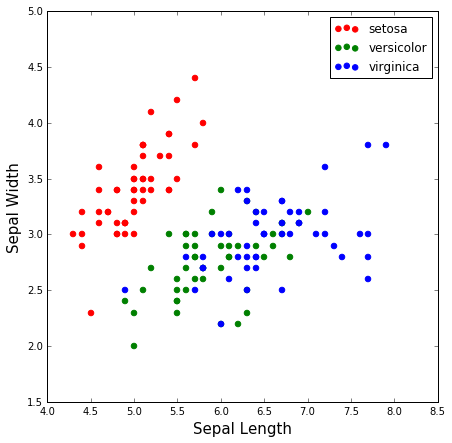

In [104]:
import matplotlib.pyplot as plt
%matplotlib inline

fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(1, 1, 1)
for target, color in zip(iris_df.target.unique(), ['r', 'g', 'b']):
    sub_df = iris_df.query('target == @target')
    ax.scatter(sub_df.sepal_length.values, sub_df.sepal_width.values, color=color, 
               label=iris_data.target_names[target], s=30)
ax.legend(loc='best')
ax.set_xlabel('Sepal Length', size=15)
ax.set_ylabel('Sepal Width', size=15)

It seems that a model might have a good chance at being able to distinguish between classes based solely on sepal length and width, and petal length and width. Frequently we'd want to more EDA, but since that isn't the subject of today's lecture we're going to move on to the one that is, modeling. To try and predict the class of an unknown flower with known measurement we are going to use logistic regression. This is a standard linear based model used for classification problems. We are going to import the [logistic regression](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) model from `sklearn` then feed our features and associated labels to an instance of it via the `fit()` method.

In [143]:
from sklearn.linear_model import LogisticRegression

X = iris_df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']].values
y = iris_df.label.values
logistic_model = LogisticRegression()
logistic_model.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

You can see that all we had to do to set up our model is create an instance of the `LogisticRegression` class and then call the `fit()` method on the passing it the features and their associated targets. Here we stored the features and targets in the variables `X` and `y`, respectively, this is common notation.

Now we can see what our model would predict if it just saw data with an unknown label. What would we predict a flower with `sepal length = 4.5`, `sepal_width = 3.3`, `petal_length = 1.6` and `petal_width = 0.2`? We can use the predict method on our newly fitted model to find out! It thinks it's a "Setosa". The model will also accept a 2-dimensional array and hand back preditions for each row in a `numpy array`.

In [144]:
print 'Model guess for single point: {}'.format(logistic_model.predict(np.array([[4.5, 3.3, 1.6, 0.2]]))[0])
logistic_model.predict(np.array([[7.2, 2.8, 6.6, 2], [6.2, 2.5, 3.6, 2], [4.7, 3.6, 1.9, .1]]))

Model guess for single point: setosa


array(['virginica', 'versicolor', 'setosa'], dtype=object)

In fact, now we can see what our model would predict for all of the values that we have! In addition we can see how good it is at predicting with the `score()` method.

In [134]:
logistic_model.predict(X)

array(['setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'virginica', 'versicolor', 'versicolor', 'versicolor',
       'virginica', 'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'vers

In [135]:
logistic_model.score(X, y)

0.95999999999999996

To use the `score()` method we pass it all the data points we have and their associated labels. The model then predicts what it thinks the class each data point belongs to and compares it to the known label. The number that we got back is the percent that the model guessed correctly. We call this metric the **accuracy**.

This is an incredibly high score! But we did use all of the data that we scored on to train the model. For this reason, we refer to this as the **in-sample** accuracy. Frequently we want to see how our model would perform on new data. One way that we can do that is by only using a portion of the data for training and using the remaining for testing. Let's see what that would look like. To make our job easier we're going to import another function from `sklearn`.

In [139]:
from sklearn.cross_validation import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y)
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)
logistic_model.score(X_test, y_test)

0.97368421052631582

Here we are using `train_test_split()` to divide our `X` features and `y` labels into two groups, while maintain their matched information. Be default `train_test_split()` makes the train set ~75% of the data points and the test set the remaining ~25%. You can control it if you'd like, however, check out the [docs](http://scikit-learn.org/stable/modules/generated/sklearn.cross_validation.train_test_split.html) to see how.

This time around we can see that our accuracy score is worse :'( But the model is being tested on data points that are completely unknown to it unlike before. For this reason we refer to this metric as the **out-of-sample** accuracy. And 92% is very good!

# Regression Problems

As discussed in the introduction, regression problems enter us into a realm where we want to predict some continuous value based on some inputs. To accomplish this we are going to want some data with a taget that is continuous. We are going to be working with the boston data set today. Just as with the iris data set it is located in the `sklearn.datasets` module. Let's take a look the data set's description and, as before load it into a `dataframe`.

In [165]:
from sklearn.datasets import load_boston

boston_data = load_boston()
print boston_data.DESCR

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

In [167]:
column_names = [name.lower() for name in boston_data.feature_names]
boston_df = pd.DataFrame(boston_data.data, columns=column_names)
boston_df['medv'] = boston_data.target
boston_df

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311,15.2,386.71,17.10,18.9
